In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
df = pd.read_csv("./data/StudentsPerformance.csv")

In [5]:
df.shape

(1000, 8)

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [27]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [50]:
#¿Qué tipo de variables tiene el dataset? Detalle el tipo de variable de cada
#columna.
df.dtypes
# la variable genero: Cualitativa nominal
# la variable Raza: Cualitativa nominal
# la variable Nivel de educacion parental: cualitativa ordinal
# la variable Tipo de alimentacion: cualitativa nominal
# la variable Preparacion para el examen: cualitativa nominal
# la variable Puntaje en matematicas: cuantitativa discreta
# la variable Puntaje en escritura: cuantitativa discreta
# la variable Puntaje en lectura: cuantitativa discreta

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [48]:
#¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje?

def promedio(dataframe, materia):
    columna = materia+" score"
    suma = dataframe[columna].sum()
    promedio = suma/dataframe[columna].count()
    print(f"El promedio de {columna} es {promedio}")
    return promedio


matematicas = promedio(df,"math" )
escritura = promedio(df,"writing")
lectura = promedio(df,"reading")

def mayor(x,y,z):
    respuesta = ""
    if x >= y:
        if x >= z:
            respuesta = f"El mayor promedio es de Math Score con {x}"
        respuesta = f"El mayor promedio es de Reading Score con {z}"
    elif y>=z:
        respuesta = f"El mayor promedio es de Writing Score con {y}"
    respuesta = f"El mayor promedio es de Reading Score con {z}"
    return respuesta
    
    
mayor(matematicas, escritura, lectura)




El promedio de math score es 66.089
El promedio de writing score es 68.054
El promedio de reading score es 69.169


'El mayor promedio es de Reading Score con 69.169'

,math score,writing score,reading score
math score,1.000000,0.802642,0.817580
writing score,0.802642,1.000000,0.954598
reading score,0.817580,0.954598,1.000000


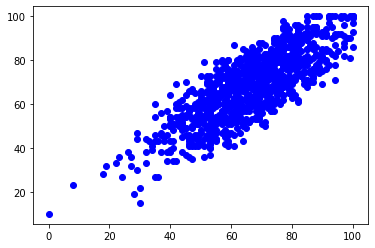

In [205]:
#¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?
scores = df[['math score', 'writing score', 'reading score']]

plt.plot(df['math score'], df['writing score'], "bo")

scores.corr()
#Entre los puntajes de matematicas y escritura existe una correlacion
#positiva fuerte de 0,80 en la que se ve una relacion lineal fuerte entre
#las variables y nos dice que estos puntajes estan correlacionados


,math score,writing score,reading score
math score,1.000000,0.802642,0.817580
writing score,0.802642,1.000000,0.954598
reading score,0.817580,0.954598,1.000000


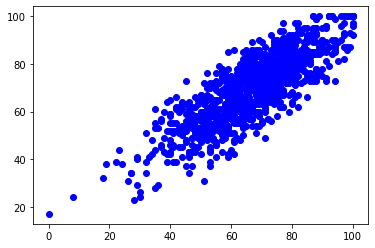

In [206]:
plt.plot(df['math score'], df['reading score'], "bo")

scores.corr()
#Entre los puntajes de matematicas y lectura existe una correlacion
#positiva fuerte de 0,82 en la que se ve una relacion lineal fuerte entre
#las variables y nos dice que estos puntajes estan correlacionados


,math score,writing score,reading score
math score,1.000000,0.802642,0.817580
writing score,0.802642,1.000000,0.954598
reading score,0.817580,0.954598,1.000000


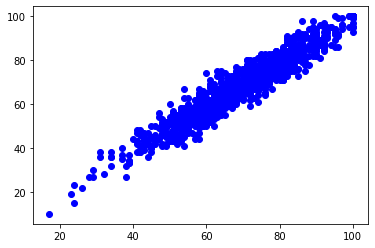

In [207]:
plt.plot(df['reading score'], df['writing score'], "bo")

scores.corr()
#Entre los puntajes de lectura y escritura existe una correlacion
#positiva muy fuerte de 0,95 en la que se ve una relacion lineal muy fuerte entre
#las variables y nos dice que estos puntajes estan correlacionados casi por completo


,math score
gender,
male,69


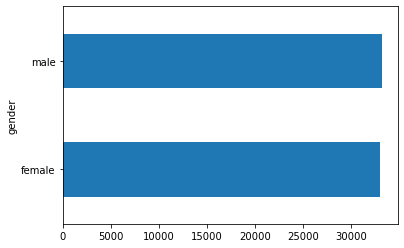

In [95]:
#¿Hay alguna diferencia observable en los puntajes de la asignatura de
#matemáticas entre hombres y mujeres? ¿Quiénes, hombres o mujeres, tienen la
#mediana más alta para esta misma asignatura?
dos =puntoDos = df.groupby("gender")['math score'].sum().plot(kind="barh")
puntoDos = df.groupby("gender")['math score'].median().to_frame()
puntoDos = puntoDos.sort_values('math score', ascending=False).head(1)

#De manera observable, podemos darnos cuenta que existe una pequena diferencia 
#entre los puntajes de matematicas de hombres y mujeres, siendo el de 
#los hombres mayor al de las mujeres
#Adicionalmente, la mediana entre los dos generos nos permite ver que la 
#media mayor es la de los hombres con 69

dos
puntoDos

In [150]:
#¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron
#un puntaje superior a 90 en la asignatura de escritura? Liste los niveles de
#escolaridad del más al menos frecuente

tres = df.loc[df['writing score']>90]


punto5 = tres.groupby("parental level of education")['lunch'].count().to_frame().rename(columns = {'lunch':'cantidad'})
punto5 = puntoTres.sort_values('cantidad', ascending = False)
punto5

,cantidad
parental level of education,
associate's degree,19
some college,18
bachelor's degree,15
master's degree,10
some high school,5
high school,1


In [218]:
#¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a
#90 en las tres asignaturas? ¿Qué porcentaje de los estudiantes obtuvieron
#puntajes iguales o superiores a 90 en las tres asignaturas y que adicionalmente
#estudiaron para los exámenes?

pilos = df.loc[(df['math score']>=90) &(df['writing score']>=90)&(df['reading score']>=90)]
pilos

#juiciosos = df.loc[(df['math score']>=90) &(df['writing score']>=90)&(df['reading score']>=90)&(df['test preparation course']>= 'completed')]

#punto6 = pilos["math score"].value_counts(normalize =True).to_frame()
#punto6


2       90
114     99
149    100
165     96
179     97
Name: math score, dtype: int64